<a href="https://colab.research.google.com/github/k4trinderoya1/my_colab_notebooks_EEBG/blob/main/%22Lab5_1_Iascova_Ecaterina_EEBG_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 6 Assignment: Producing Publication-Ready Figures**

##**Instructions**

In your own Google Colab, use the commands presented in the previous sections to create the following graphs using the 'titanic' example dataset included with Seaborn. You will be graded based on whether your Colab notebook can produce graphs identical or near-identical to the five plots at the end of this assignment.

Notes:

*   The position of your plots' legends may be different.
*   While not required by this assignment, remember you can export your plots using Matplotlib's *savefig()* function with *bbox_inches='tight'*.

To start this assignment, return to the commands you used to produce the plots in Lab 2. Your plots should looks as follows:

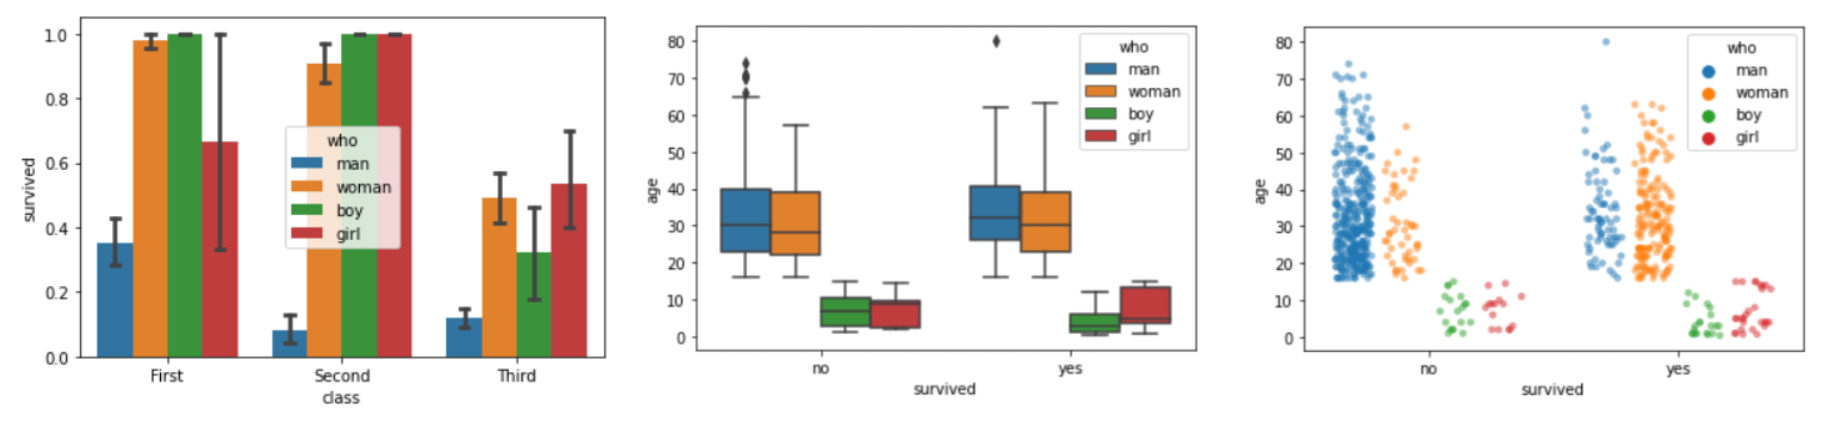

Now, let's use what we learned this lab to improve these three graphs.
To start, rerun the following commmands we used last lab to modify the 'titanic' dataset.

###Deliverables

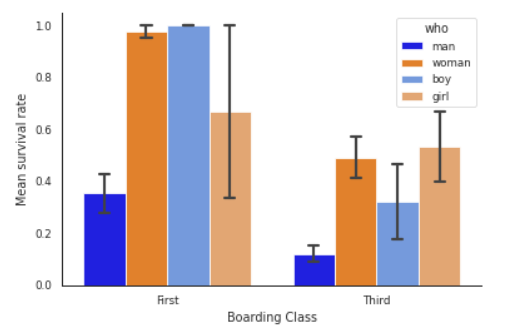

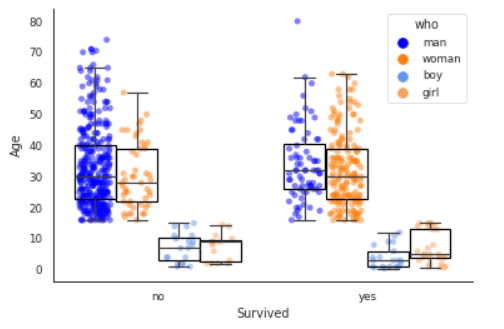

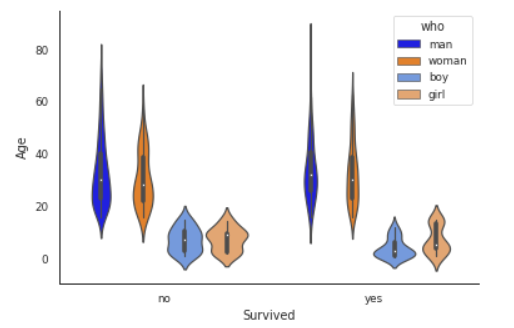

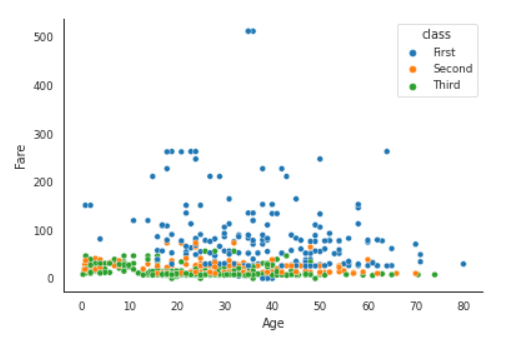



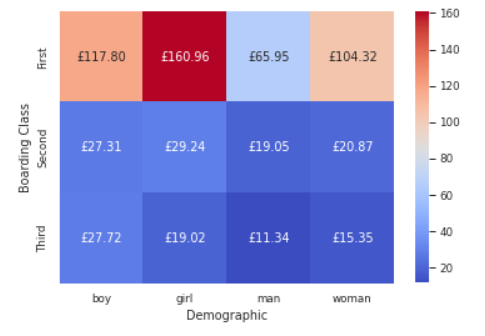

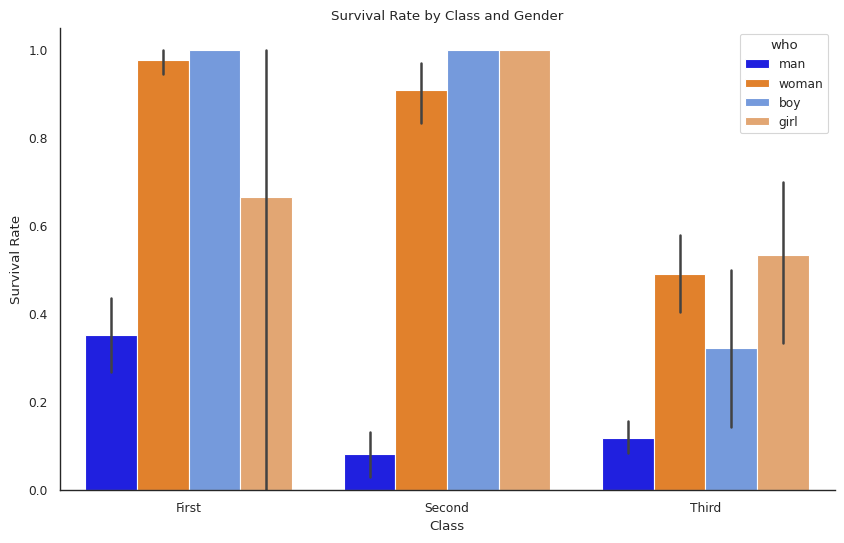

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
lab3_data = sns.load_dataset('titanic')

lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1, 'survived_str'] = 'yes'

sns.set_style("white")
sns.set_context("paper")

palette = {'man':'blue', 'woman':'tab:orange', 'boy':'cornflowerblue', 'girl':'sandybrown'}

plt.figure(figsize=(10, 6))
axes = sns.barplot(data=lab3_data, x='class', y='survived', hue='who', palette=palette)
axes.set_title('Survival Rate by Class and Gender')
axes.set_xlabel('Class')
axes.set_ylabel('Survival Rate')

sns.despine()
plt.show()


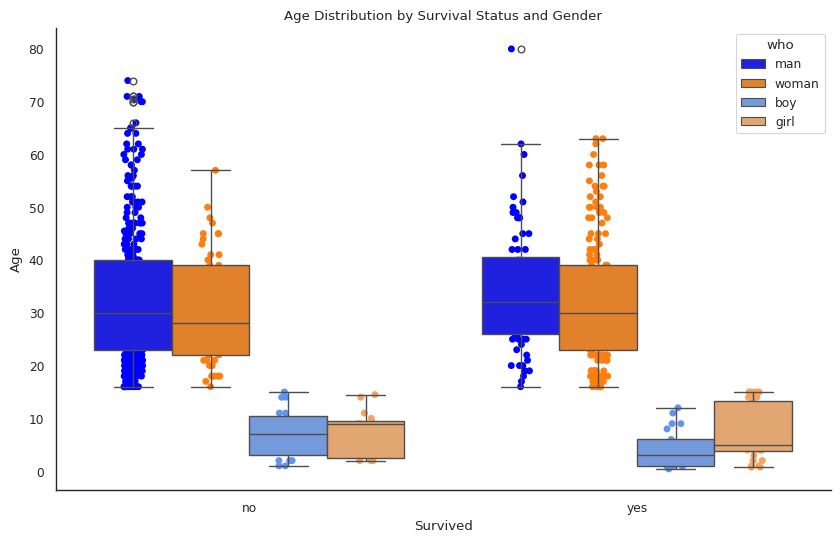

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lab3_data = sns.load_dataset('titanic')

lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1, 'survived_str'] = 'yes'

sns.set_style("white")
sns.set_context("paper")

plt.figure(figsize=(10, 6))
palette = {'man':'blue', 'woman':'tab:orange', 'boy':'cornflowerblue', 'girl':'sandybrown'}

sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', palette=palette, dodge=True, zorder=0)
axes = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', palette=palette, dodge=True, zorder=5)

axes.set_title('Age Distribution by Survival Status and Gender')
axes.set_xlabel('Survived')
axes.set_ylabel('Age')
handles, labels = axes.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

sns.despine()
plt.show()


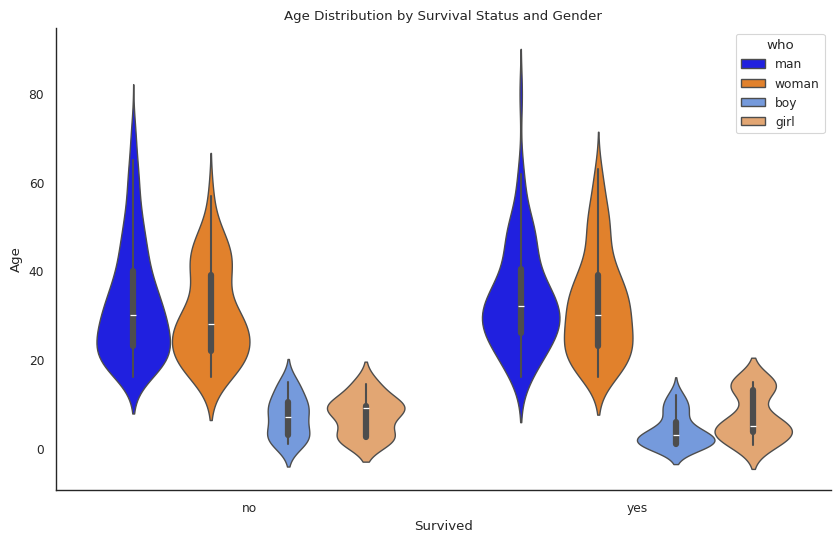

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lab3_data = sns.load_dataset('titanic')

lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1, 'survived_str'] = 'yes'

sns.set_style("white")
sns.set_context("paper")

plt.figure(figsize=(10, 6))
palette = {'man':'blue', 'woman':'tab:orange', 'boy':'cornflowerblue', 'girl':'sandybrown'}
axes = sns.violinplot(data=lab3_data, x='survived_str', y='age', hue='who', palette=palette, dodge=True)
axes.set_title('Age Distribution by Survival Status and Gender')
axes.set_xlabel('Survived')
axes.set_ylabel('Age')

sns.despine()
plt.show()


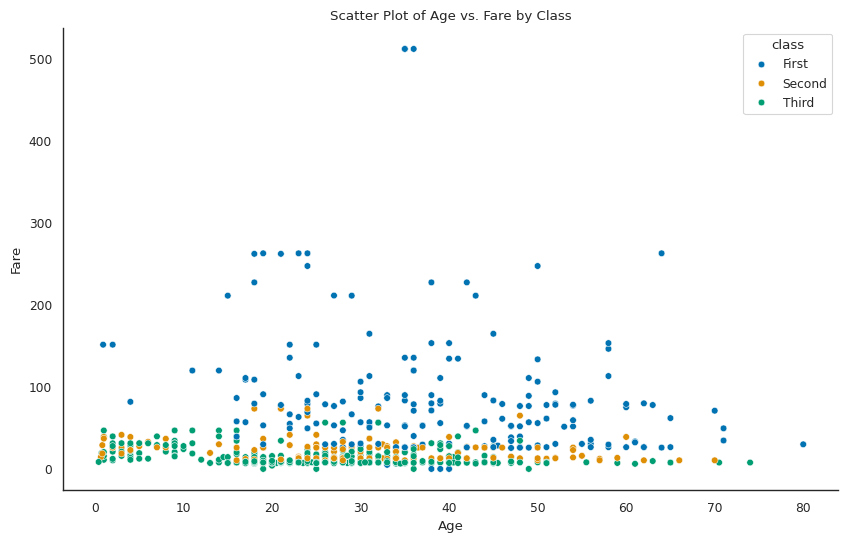

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
lab3_data = sns.load_dataset('titanic')

sns.set_style("white")
sns.set_context("paper")

plt.figure(figsize=(10, 6))
axes = sns.scatterplot(data=lab3_data, x='age', y='fare', hue='class', palette='colorblind')
axes.set_title('Scatter Plot of Age vs. Fare by Class')
axes.set_xlabel('Age')
axes.set_ylabel('Fare')

sns.despine()
plt.show()


In [8]:
lab3_data_subset=lab3_data[['class','who','fare']]
lab3_data_subset=lab3_data_subset.dropna(how='any')
lab3_data_subsetAverage=lab3_data_subset.groupby(['class','who']).mean()
lab3_data_subsetAverage=lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

,class,who,fare
0,First,child,139.382633
1,First,man,65.951086
2,First,woman,104.317995
3,Second,child,28.323905
4,Second,man,19.054124


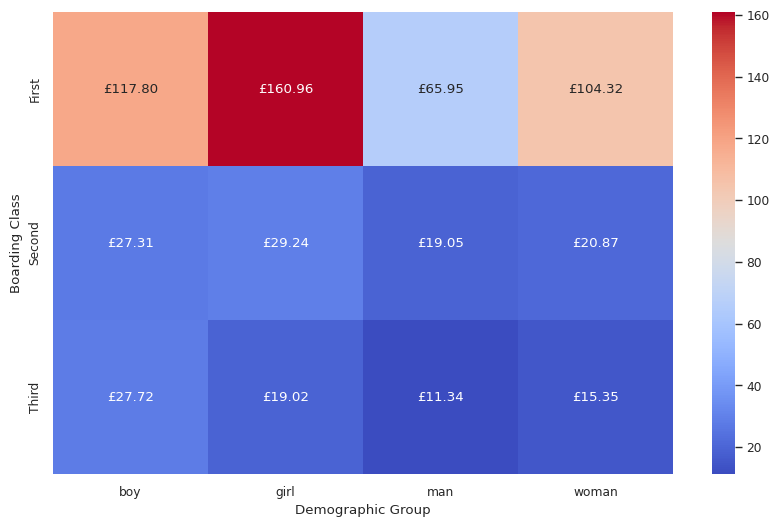

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
lab3_data = sns.load_dataset('titanic')

sns.set_style("white")
sns.set_context("paper")
lab3_data_subset = lab3_data[['class', 'who', 'fare', 'sex']]
lab3_data_subset = lab3_data_subset.dropna(how='any')

def categorize_child(row):
    if row['who'] == 'child':
        return 'boy' if row['sex'] == 'male' else 'girl'
    else:
        return row['who']

lab3_data_subset['who'] = lab3_data_subset.apply(categorize_child, axis=1)

lab3_data_subset = lab3_data_subset[['class', 'who', 'fare']]
lab3_data_subsetAverage = lab3_data_subset.groupby(['class', 'who']).mean()
lab3_data_subsetAverage = lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data=lab3_data_subsetAverage.pivot(index='class', columns='who', values='fare'),
                      annot=True, fmt='.2f', cmap='coolwarm')

for text in heatmap.texts:
    text.set_text('£' + text.get_text())
x_labels = lab3_data_subsetAverage['who'].unique()

heatmap.set(xlabel='Demographic Group', ylabel='Boarding Class', xticklabels=x_labels)
plt.show()
